In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:

# Cargar la base de datos
file_path = '/content/base de datos def.xlsx'
df = pd.read_excel(file_path)


In [ ]:
# Cargar el archivo (asegúrate de subir el archivo antes de ejecutar esta celda)
from google.colab import files
uploaded = files.upload()

Saving base de datos def.xlsx to base de datos def (1).xlsx


In [ ]:
# Leer el archivo Excel
df = pd.read_excel(next(iter(uploaded)))

# Mostrar las primeras filas del dataframe
df.head()

,fecha,precio,precio por m2,Piso,superficie,nº habitaciones,nº baños,ascensor,parking,trastero,densidad poblacional,Distrito
0,2022,795000,3955.2239,3,201.0,2.0,2,1.0,1.0,1.0,45135.0,Ciudad Lineal
1,2022,335000,5317.4603,7,63.0,2.0,2,1.0,1.0,0.0,39332.0,Ciudad Lineal
2,2022,227000,4934.7826,bj,46.0,1.0,1,1.0,1.0,1.0,26408.0,Barajas
3,2022,437000,3735.0427,3,117.0,3.0,2,1.0,0.0,1.0,62683.0,Carabanchel
4,2022,410000,2290.5028,NaN,179.0,0.0,1,1.0,1.0,1.0,45135.0,Ciudad Lineal


In [ ]:
# Normalizar los valores en la columna "Piso" si existe
if "Piso" in df.columns:
    df["Piso"] = df["Piso"].astype(str).str.strip().str.lower()
    df["Piso"] = df["Piso"].replace({"bj": 0, "bajo": 0, "sótano": -1, "sotano": -1})

    # Convertir a número (reemplazando errores por NaN)
    df["Piso"] = pd.to_numeric(df["Piso"], errors='coerce')

In [ ]:

# 1. ELIMINAR FILAS DUPLICADAS
df.drop_duplicates(inplace=True)

In [ ]:

# 2. TRATAMIENTO DE VALORES NULOS
# Rellenar valores nulos dependiendo del tipo de variable
for column in df.columns:
    if df[column].dtype == 'object':  # Para variables categóricas
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:  # Para variables numéricas
        df[column].fillna(df[column].median(), inplace=True)

<ipython-input-13-733e8bc61ba8>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
<ipython-input-13-733e8bc61ba8>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
# 3. TRATAMIENTO DE ATÍPICOS (Outliers) en "precio por m²"
if "precio por m2" in df.columns:
    Q1 = df["precio por m2"].quantile(0.25)
    Q3 = df["precio por m2"].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    df = df[(df["precio por m2"] >= limite_inferior) & (df["precio por m2"] <= limite_superior)]


In [ ]:
# Guardar la base de datos limpia en un archivo Excel
cleaned_file_path = "base_de_datos_limpia.xlsx"
df.to_excel(cleaned_file_path, index=False)

# Permitir la descarga del archivo en Google Colab
from google.colab import files
files.download(cleaned_file_path)

# Mostrar la base de datos limpia
print("📊 **Base de Datos Limpia después del tratamiento de nulos y outliers:**")
display(df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📊 **Base de Datos Limpia después del tratamiento de nulos y outliers:**


,fecha,precio,precio por m2,Piso,superficie,nº habitaciones,nº baños,ascensor,parking,trastero,densidad poblacional,Distrito
0,2022,795000,3955.2239,3.0,201.0,2.0,2,1.0,1.0,1.0,45135.0,Ciudad Lineal
1,2022,335000,5317.4603,7.0,63.0,2.0,2,1.0,1.0,0.0,39332.0,Ciudad Lineal
2,2022,227000,4934.7826,0.0,46.0,1.0,1,1.0,1.0,1.0,26408.0,Barajas
3,2022,437000,3735.0427,3.0,117.0,3.0,2,1.0,0.0,1.0,62683.0,Carabanchel
4,2022,410000,2290.5028,1.0,179.0,0.0,1,1.0,1.0,1.0,45135.0,Ciudad Lineal
...,...,...,...,...,...,...,...,...,...,...,...,...
40672,2024,1445000,2822.2656,1.0,512.0,5.0,5,1.0,1.0,1.0,69249.0,Fuencarral-El-Pardo
40673,2024,1395000,2719.2982,1.0,513.0,5.0,5,1.0,1.0,1.0,69249.0,Fuencarral-El-Pardo
40675,2024,320000,4050.6329,1.0,79.0,2.0,2,1.0,1.0,0.0,43819.0,Carabanchel
40680,2024,1530850,7324.6411,2.0,209.0,3.0,2,1.0,1.0,1.0,35482.0,Chamartín


In [ ]:
# 4. MEDIDAS ESTADÍSTICAS
medidas = df.describe().T
medidas["moda"] = df.mode().iloc[0]

In [ ]:
#5. MEDIDAS DE DISPERSIÓN Y ASOCIACIÓN
varianza = df.var(numeric_only=True)
covarianza = df.cov(numeric_only=True)
correlacion_pearson = df.corr(method='pearson', numeric_only=True)


In [ ]:
# 6. MEDIDAS DE FORMA: Curtosis y Asimetría
curtosis = df.kurtosis(numeric_only=True)
asimetria = df.skew(numeric_only=True)

In [ ]:
# 7. CUARTILES
cuartiles = df.quantile([0.25, 0.5, 0.75], numeric_only=True).T

In [ ]:
# Combinar todas las métricas en una tabla
medidas_completas = medidas.copy()
medidas_completas["varianza"] = varianza
medidas_completas["curtosis"] = curtosis
medidas_completas["asimetria"] = asimetria

In [ ]:

# 8. MOSTRAR LA TABLA COMPLETA EN GOOGLE COLAB
print("\n **Medidas Estadísticas Completas**")
display(medidas_completas)

print("\n **Matriz de Covarianza**")
display(covarianza)

print("\n **Matriz de Correlación de Pearson**")
display(correlacion_pearson)

print("\n **Curtosis de las Variables**")
display(curtosis.to_frame(name="Curtosis"))

print("\n **Asimetría de las Variables**")
display(asimetria.to_frame(name="Asimetría"))

print("\n **Cuartiles de las Variables**")
display(cuartiles)


📊 **Medidas Estadísticas Completas**


,count,mean,std,min,25%,50%,75%,max,moda,varianza,curtosis,asimetria
fecha,12683.0,2022.964204,0.819729,2022.0000,2022.0000,2023.000,2024.0000,2.024000e+03,2022,6.719562e-01,-1.508874,0.066106
precio,12683.0,562771.196010,488010.382413,56000.0000,277706.5000,398500.000,660610.0000,4.900000e+06,299000,2.381541e+11,14.799580,3.109222
precio por m2,12683.0,4773.267742,1833.712104,1056.6038,3327.9345,4398.287,5983.6066,1.003514e+04,5000.0,3.362500e+06,-0.294329,0.645580
Piso,12683.0,2.008436,1.973849,0.0000,1.0000,1.000,3.0000,2.200000e+01,1.0,3.896081e+00,8.869160,2.300033
superficie,12683.0,116.506237,86.856107,21.0000,70.0000,95.000,129.0000,2.132000e+03,88.0,7.543983e+03,60.081160,4.940573
nº habitaciones,12683.0,2.239533,1.101758,0.0000,1.0000,2.000,3.0000,1.600000e+01,2.0,1.213870e+00,2.646393,0.727283
nº baños,12683.0,1.944729,0.963219,0.0000,1.0000,2.000,2.0000,1.200000e+01,2,9.277918e-01,7.999622,2.091843
ascensor,12683.0,0.959316,0.218778,0.0000,1.0000,1.000,1.0000,2.000000e+00,1.0,4.786365e-02,15.944311,-3.321762
parking,12683.0,0.788142,0.408641,0.0000,1.0000,1.000,1.0000,1.000000e+00,1.0,1.669876e-01,-0.010590,-1.410465
trastero,12683.0,0.638887,0.480342,0.0000,0.0000,1.000,1.0000,1.000000e+00,1.0,2.307287e-01,-1.665747,-0.578373



📊 **Matriz de Covarianza**


,fecha,precio,precio por m2,Piso,superficie,nº habitaciones,nº baños,ascensor,parking,trastero,densidad poblacional
fecha,0.671956,2.300296e+04,6.830797e+01,0.017176,3.922933e+00,0.009206,0.018838,0.037339,0.008738,-0.003150,-1.231509e+03
precio,23002.963333,2.381541e+11,4.288762e+08,33294.332678,3.545558e+07,321793.708683,344425.806214,-7260.605572,15041.321848,3419.064795,-8.370982e+08
precio por m2,68.307965,4.288762e+08,3.362500e+06,497.614263,6.656259e+03,-58.954954,128.098229,40.472569,-57.237756,-32.886986,-1.676772e+06
Piso,0.017176,3.329433e+04,4.976143e+02,3.896081,-6.407299e+00,0.060193,-0.025476,0.051124,0.015035,0.052566,-4.219264e+03
superficie,3.922933,3.545558e+07,6.656259e+03,-6.407299,7.543983e+03,67.856021,65.950739,-2.713829,4.411075,1.055241,-1.272894e+05
nº habitaciones,0.009206,3.217937e+05,-5.895495e+01,0.060193,6.785602e+01,1.213870,0.860819,-0.029759,0.082686,0.060011,-2.412920e+03
nº baños,0.018838,3.444258e+05,1.280982e+02,-0.025476,6.595074e+01,0.860819,0.927792,-0.029295,0.057916,0.024512,-1.916543e+03
ascensor,0.037339,-7.260606e+03,4.047257e+01,0.051124,-2.713829e+00,-0.029759,-0.029295,0.047864,-0.004125,-0.002707,-6.720171e+02
parking,0.008738,1.504132e+04,-5.723776e+01,0.015035,4.411075e+00,0.082686,0.057916,-0.004125,0.166988,0.080089,-3.133211e+03
trastero,-0.003150,3.419065e+03,-3.288699e+01,0.052566,1.055241e+00,0.060011,0.024512,-0.002707,0.080089,0.230729,-5.069766e+02



📊 **Matriz de Correlación de Pearson**


,fecha,precio,precio por m2,Piso,superficie,nº habitaciones,nº baños,ascensor,parking,trastero,densidad poblacional
fecha,1.000000,0.057502,0.045443,0.010616,0.055099,0.010193,0.023859,0.208202,0.026086,-0.007999,-0.062210
precio,0.057502,1.000000,0.479261,0.034564,0.836479,0.598498,0.732726,-0.068005,0.075425,0.014586,-0.071030
precio por m2,0.045443,0.479261,1.000000,0.137483,0.041793,-0.029181,0.072525,0.100885,-0.076385,-0.037337,-0.037865
Piso,0.010616,0.034564,0.137483,1.000000,-0.037373,0.027679,-0.013400,0.118388,0.018640,0.055442,-0.088515
superficie,0.055099,0.836479,0.041793,-0.037373,1.000000,0.709091,0.788305,-0.142817,0.124280,0.025293,-0.060685
nº habitaciones,0.010193,0.598498,-0.029181,0.027679,0.709091,1.000000,0.811149,-0.123460,0.183656,0.113395,-0.090688
nº baños,0.023859,0.732726,0.072525,-0.013400,0.788305,0.811149,1.000000,-0.139016,0.147139,0.052979,-0.082392
ascensor,0.208202,-0.068005,0.100885,0.118388,-0.142817,-0.123460,-0.139016,1.000000,-0.046145,-0.025763,-0.127195
parking,0.026086,0.075425,-0.076385,0.018640,0.124280,0.183656,0.147139,-0.046145,1.000000,0.408019,-0.317497
trastero,-0.007999,0.014586,-0.037337,0.055442,0.025293,0.113395,0.052979,-0.025763,0.408019,1.000000,-0.043705



📊 **Curtosis de las Variables**


,Curtosis
fecha,-1.508874
precio,14.799580
precio por m2,-0.294329
Piso,8.869160
superficie,60.081160
nº habitaciones,2.646393
nº baños,7.999622
ascensor,15.944311
parking,-0.010590
trastero,-1.665747



📊 **Asimetría de las Variables**


,Asimetría
fecha,0.066106
precio,3.109222
precio por m2,0.645580
Piso,2.300033
superficie,4.940573
nº habitaciones,0.727283
nº baños,2.091843
ascensor,-3.321762
parking,-1.410465
trastero,-0.578373



📊 **Cuartiles de las Variables**


,0.25,0.50,0.75
fecha,2022.0000,2023.000,2024.0000
precio,277706.5000,398500.000,660610.0000
precio por m2,3327.9345,4398.287,5983.6066
Piso,1.0000,1.000,3.0000
superficie,70.0000,95.000,129.0000
nº habitaciones,1.0000,2.000,3.0000
nº baños,1.0000,2.000,2.0000
ascensor,1.0000,1.000,1.0000
parking,1.0000,1.000,1.0000
trastero,0.0000,1.000,1.0000


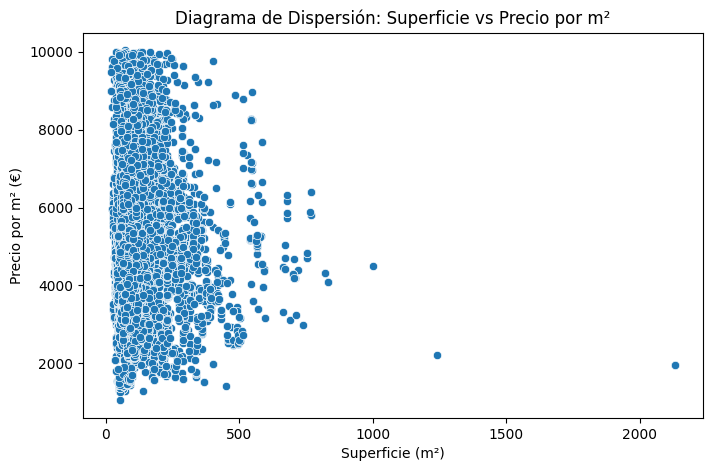

In [ ]:
# 9. GRÁFICOS DESCRIPTIVOS

# Diagrama de dispersión: Precio por m² vs Superficie
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["superficie"], y=df["precio por m2"])
plt.xlabel("Superficie (m²)")
plt.ylabel("Precio por m² (€)")
plt.title("Diagrama de Dispersión: Superficie vs Precio por m²")
plt.show()
